In [1]:
import numpy as np
from tensorflow.keras.models import load_model  # Load trained model
from IPython.display import Image
from tensorflow.keras.preprocessing import image

In [2]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

```Python
# Created model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = utils.to_categorical(y=y_train, num_classes=10)
y_test = utils.to_categorical(y=y_test, num_classes=10)


classes = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boots']

model = Sequential()
model.add(layer=Dense(units=800, activation='relu', input_dim=784))
model.add(layer=Dense(units=10, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    x=x_train,
    y=y_train,
    batch_size=200,
    epochs=100,
    validation_split=0.2,
    verbose=1
)

# Evaluate the model
model.evaluate(x=x_test, y=y_test, verbose=1)

# Save the model
model.save('fashion_mnist_dense.h5')
```

In [3]:
# Load the model
model = load_model(filepath='./fashion_mnist_dense.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 800)               628000    
                                                                 
 dense_3 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636010 (2.43 MB)
Trainable params: 636010 (2.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Initialize pictures
img1 = 'Historia.jpg'
img2 = 'white.jpg'

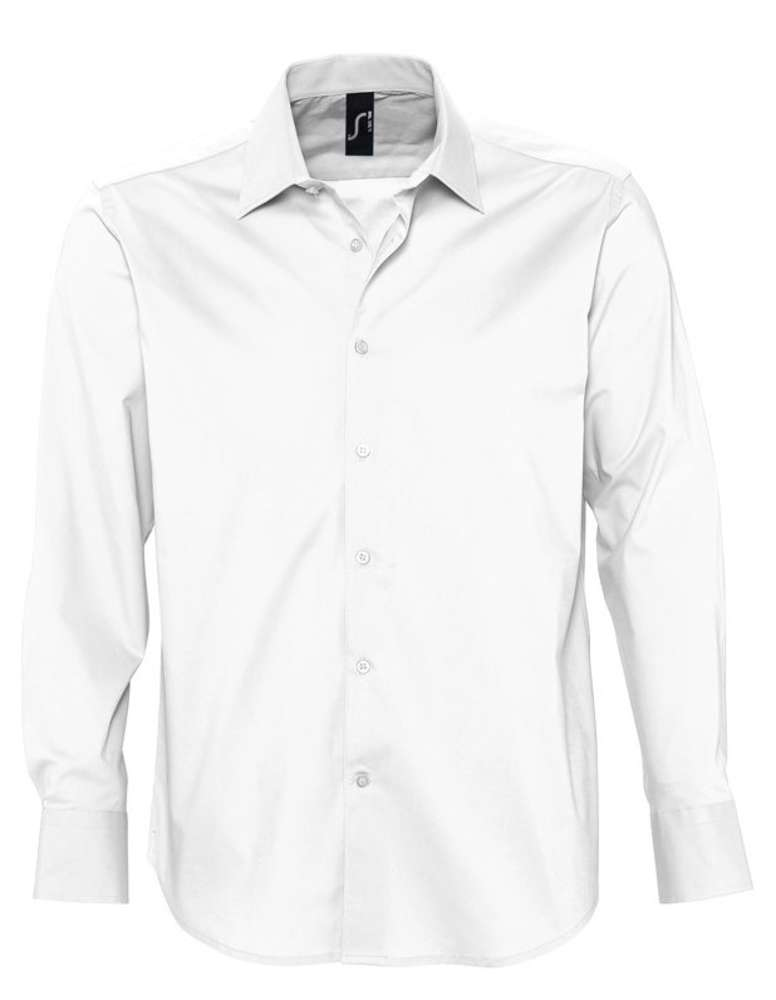

In [5]:
# Display shirt
Image(img2, width=150, height=150)

In [6]:
# Load pictures and preprocess it
# from tensorflow.keras.preprocessing import image
shirt = image.load_img(path=img2, target_size=(28, 28), color_mode='grayscale')
shirt

In [7]:
# Invert and normalize picture
x = image.img_to_array(shirt)
# Makes flat vector
x = x.reshape(1, 784)
# Invert picture
x = 255 - x  # MNIST used 0 as white and 255 as black
# Normalize picture
x /= 255

A fully connected neural network can only work with flat data

In [8]:
# Makes prediction
prediction = model.predict(x)
print(prediction, end='\n\n')
print(classes[np.argmax(prediction)])

1/1 [==============================] - 0s 140ms/step
[[3.9077289e-03 1.2210651e-06 8.9395933e-02 1.6849010e-06 6.0970633e-06
  2.3235675e-02 8.7890583e-01 8.9193130e-04 3.6533342e-03 5.5631807e-07]]

рубашка


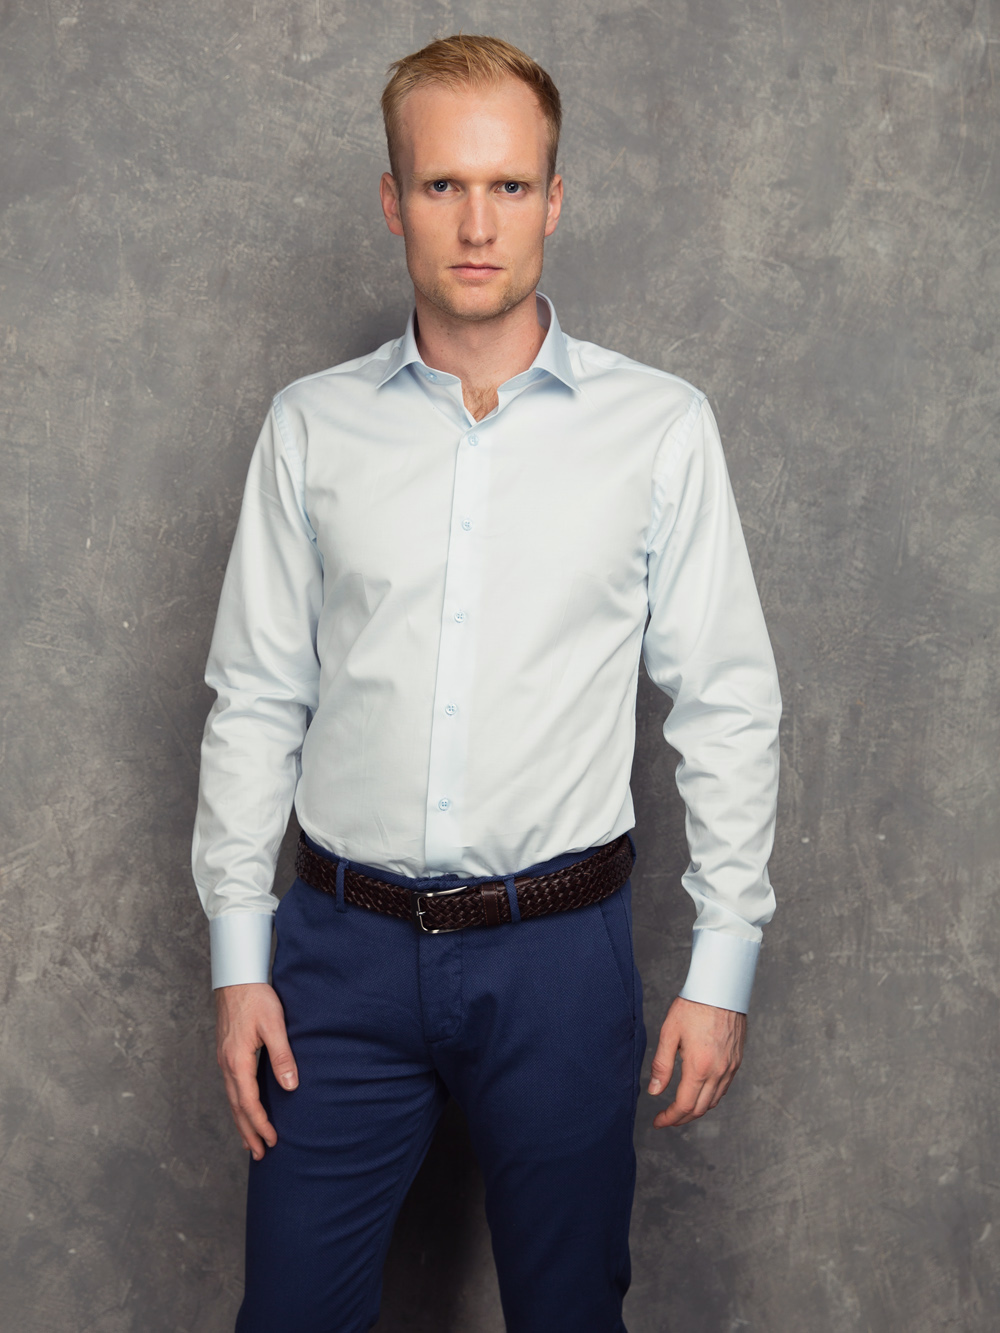

In [9]:
# Display shirt with me
Image(img1, width=150, height=150)

In [10]:
# Load pictures and preprocess it
# from tensorflow.keras.preprocessing import image
shirt = image.load_img(path=img1, target_size=(28, 28), color_mode='grayscale')
shirt

In [11]:
# Invert and normalize picture
x = image.img_to_array(shirt)
# Makes flat vector
x = x.reshape(1, 784)
# Invert picture
x = 255 - x
# Normalize picture
x /= 255

In [12]:
# Makes prediction
prediction = model.predict(x)
print(prediction, end='\n\n')
print(classes[np.argmax(prediction)])

1/1 [==============================] - 0s 26ms/step
[[2.8647544e-30 1.7823218e-34 5.0467025e-10 2.3007985e-29 5.3172198e-25
  1.1527441e-26 1.3472039e-29 4.8200774e-34 1.0000000e+00 1.4863717e-14]]

сумка


# First prediction was correct, second is wrong but there was me in shirt